<a href="https://colab.research.google.com/github/DiplovRawal/worksheet/blob/main/Workshop4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Problem - 1: Perform a classification task with knn from scratch.

# 1. Load the Dataset:
# • Read the dataset into a pandas DataFrame.
dataset_path = "/content/drive/MyDrive/diabetes.csv"
df = pd.read_csv(dataset_path)

# • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
# (e.g., check data types, missing values, summary statistics).
print("First few rows of the dataset:")
print(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age    

In [5]:
# 2. Handle Missing Data:
# • Handle any missing values appropriately, either by dropping or imputing them based on the data.
print("Missing Values Before Handling:")
print(df.isnull().sum())

df_cleaned = df.dropna()

print("\nMissing Values After Handling:")
print(df_cleaned.isnull().sum())

Missing Values Before Handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Missing Values After Handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# 3. Feature Engineering:
# • Separate the feature matrix (X) and target variable (y).
X = df_cleaned.drop(columns=['Outcome'])
y = df_cleaned['Outcome']

# • Perform a train - test split from scratch using a 70% − 30% ratio.
split_index = int(0.7 * len(X))

shuffled_indices = np.random.permutation(len(X))
X = X.iloc[shuffled_indices]
y = y.iloc[shuffled_indices]

# Split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Display the resulting splits
print("Shape of Training Features (X_train):", X_train.shape)
print("Shape of Training Target (y_train):", y_train.shape)
print("Shape of Testing Features (X_test):", X_test.shape)
print("Shape of Testing Target (y_test):", y_test.shape)

Shape of Training Features (X_train): (537, 8)
Shape of Training Target (y_train): (537,)
Shape of Testing Features (X_test): (231, 8)
Shape of Testing Target (y_test): (231,)


In [7]:
# 4. Implement KNN:
# • Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

# • Compute distances using Euclidean distance.
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# • Write functions for:

# – Predicting the class for a single query.
def predict_single(query_point, X_train, y_train, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(query_point, X_train[i])
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_neighbors = [neighbor[1] for neighbor in distances[:k]]

    # Return the most common class
    return max(set(k_neighbors), key=k_neighbors.count)

# – Predicting classes for all test samples.
def predict(X_test, X_train, y_train, k):
    predictions = []
    for query_point in X_test:
        pred = predict_single(query_point, X_train, y_train, k)
        predictions.append(pred)
    return np.array(predictions)

# • Evaluate the performance using accuracy.
def evaluate_accuracy(y_test, y_pred):
    return np.mean(y_test == y_pred)

X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

k = 3
y_pred = predict(X_test_np, X_train_np, y_train_np, k)
accuracy = evaluate_accuracy(y_test_np, y_pred)

print(f"Accuracy of KNN classifier with k={k}: {accuracy:.2f}")

Accuracy of KNN classifier with k=3: 0.71


In [8]:
# Problem - 2 - Experimentation:

# 1. Repeat the Classification Task:
# • Scale the Feature matrix X.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# • Use the scaled data for training and testing the kNN Classifier.
# • Record the results.
y_pred_scaled = predict(X_test_scaled, X_train_scaled, y_train_np, k)

accuracy_scaled = evaluate_accuracy(y_test_np, y_pred_scaled)

print(f"Accuracy of KNN classifier with k={k} on scaled data: {accuracy_scaled:.2f}")

Accuracy of KNN classifier with k=3 on scaled data: 0.72


In [9]:
# 2. Comparative Analysis: Compare the Results -
# • Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.
y_pred_original = predict(X_test_np, X_train_np, y_train_np, k)
accuracy_original = evaluate_accuracy(y_test_np, y_pred_original)

print(f"Accuracy of KNN classifier with k={k} on original data: {accuracy_original:.2f}")
print(f"Accuracy of KNN classifier with k={k} on scaled data: {accuracy_scaled:.2f}")

Accuracy of KNN classifier with k=3 on original data: 0.71
Accuracy of KNN classifier with k=3 on scaled data: 0.72


In [10]:

# Problem - 3 - Experimentation with k:
# 1. Vary the number of neighbors - k:

k_values = list(range(1, 16))  # k values from 1 to 15
accuracy_original = []
accuracy_scaled = []
time_original = []
time_scaled = []

# • Run the KNN model on both the original and scaled datasets for a range of:
# k= 1, 2, 3, . . . 15
# • For each k, record:

for k in k_values:
    # Time for original data
    start_time = time.time()
    y_pred_original = predict(X_test_np, X_train_np, y_train_np, k)
    time_taken_original = time.time() - start_time
    accuracy_original.append(evaluate_accuracy(y_test_np, y_pred_original))
    time_original.append(time_taken_original)

    # Time for scaled data
    start_time = time.time()
    y_pred_scaled = predict(X_test_scaled, X_train_scaled, y_train_np, k)
    time_taken_scaled = time.time() - start_time
    accuracy_scaled.append(evaluate_accuracy(y_test_np, y_pred_scaled))
    time_scaled.append(time_taken_scaled)

    # Print progress every 5 steps to check status
    if k % 5 == 0:
        print(f"Completed k={k}...")

print(f"Length of k_values: {len(k_values)}")
print(f"Length of time_scaled: {len(time_scaled)}")

print("k\tAccuracy (Original)\tTime (Original)\tAccuracy (Scaled)\tTime (Scaled)")
for k, acc_orig, time_orig, acc_scaled, time_scaled in zip(k_values, accuracy_original, time_original, accuracy_scaled, time_scaled):
    print(f"{k}\t{acc_orig:.4f}\t\t{time_orig:.4f}\t\t{acc_scaled:.4f}\t\t{time_scaled:.4f}")

Completed k=5...
Completed k=10...
Completed k=15...
Length of k_values: 15
Length of time_scaled: 15
k	Accuracy (Original)	Time (Original)	Accuracy (Scaled)	Time (Scaled)
1	0.6797		0.8890		0.7186		0.9070
2	0.6840		0.8770		0.7013		0.8750
3	0.7143		0.8423		0.7229		0.8663
4	0.7100		0.8621		0.6840		0.8678
5	0.7186		0.8855		0.7273		0.8805
6	0.7186		1.0172		0.7056		1.5028
7	0.7489		1.4993		0.7273		1.3819
8	0.7489		0.8802		0.7100		0.8588
9	0.7619		0.8702		0.7359		0.8780
10	0.7273		0.8860		0.7056		0.9278
11	0.7359		0.8801		0.7403		0.8667
12	0.7273		0.8556		0.7100		0.8889
13	0.7316		0.8717		0.7229		1.4350
14	0.7403		1.4926		0.7143		1.5790
15	0.7446		0.9090		0.7273		0.9063


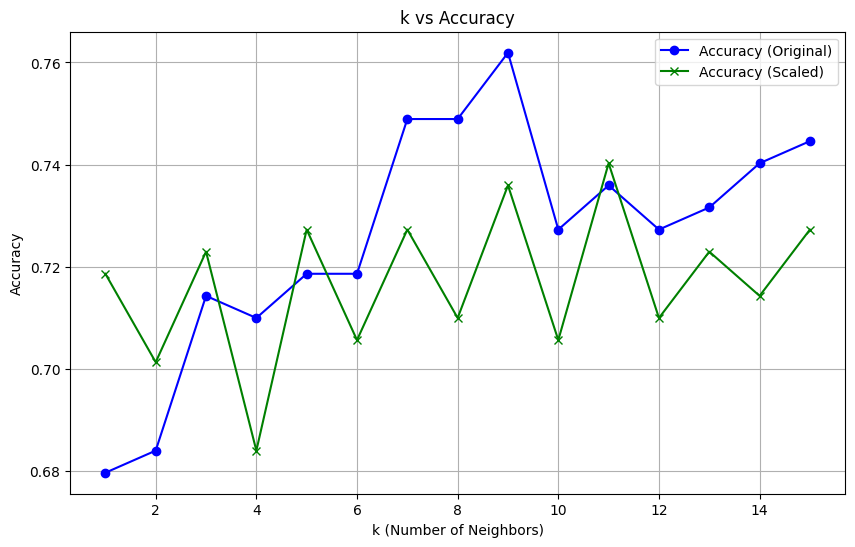

In [11]:
# 2. Visualize the Results:
# • Plot the following graphs:
# – k vs. Accuracy for original and scaled datasets.
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_original, label="Accuracy (Original)", color='blue', marker='o')
plt.plot(k_values, accuracy_scaled, label="Accuracy (Scaled)", color='green', marker='x')
plt.title("k vs Accuracy")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

